 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [20]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [21]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date",parse_dates=True, infer_datetime_format=True)


In [22]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [23]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [24]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns= pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)


In [25]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [26]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [27]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history= pd.read_csv(sp500_history_csv,index_col="Date", parse_dates=True, infer_datetime_format=True)


In [28]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes


Close    object
dtype: object

In [29]:
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [30]:
# Fix Data Types
# YOUR CODE HERE

sp500_history['Close'] = sp500_history['Close'].str.replace("$", "")
sp500_history['Close'] = sp500_history['Close'].astype(float)
sp500_history.dtypes

Close    float64
dtype: object

In [31]:
sp500_history

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [32]:
sp500_history=sp500_history.sort_values(by="Date", ascending="False")


In [33]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history['Close']=sp500_history["Close"].pct_change()

In [34]:
# Drop nulls
# YOUR CODE HERE
sp500_history.dropna(inplace=True)
sp500_history

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [35]:

# Rename Column
# YOUR CODE HERE
sp500_history.rename(columns={'Close':'S&P 500'}, 
                 inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_daily_returns = pd.concat([whale_returns,algo_returns,sp500_history], axis='columns', join='inner')

all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

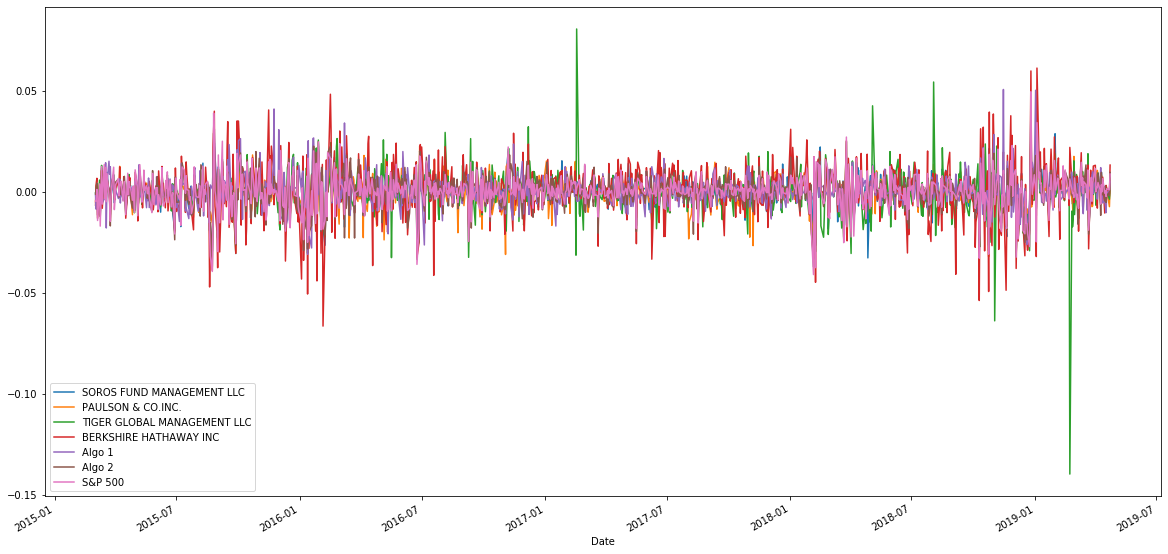

In [37]:
# Plot daily returns
# YOUR CODE HERE
all_daily_returns.plot(figsize=(20,10))

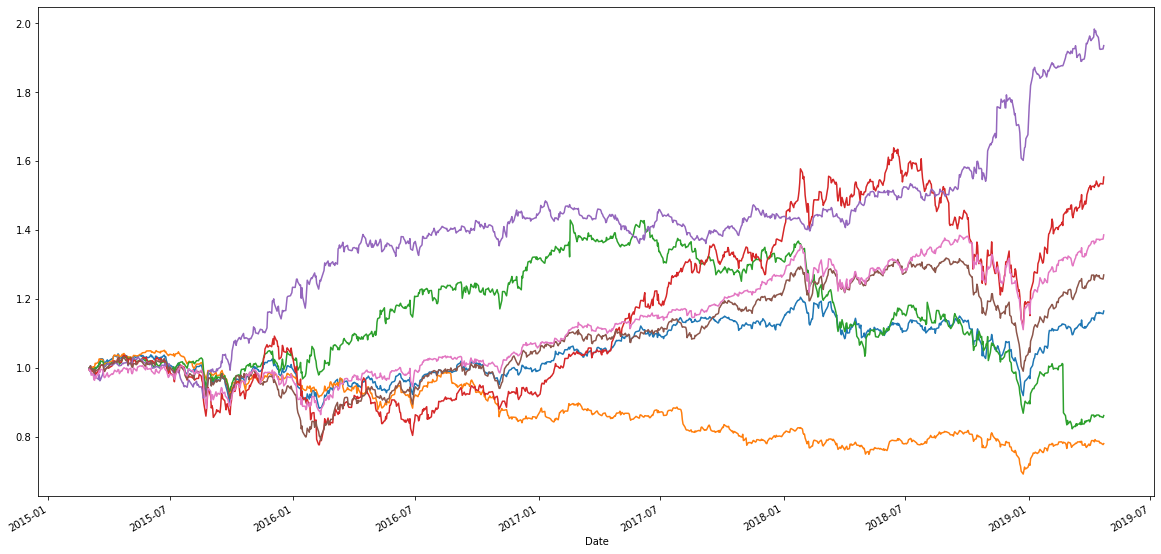

In [38]:
# Plot cumulative returns
# YOUR CODE HERE -- can we write some sort of loop here.

sfml_cumulative_returns=(1 + all_daily_returns["SOROS FUND MANAGEMENT LLC"]).cumprod()
pci_cumulative_returns=(1 + all_daily_returns['PAULSON & CO.INC. ']).cumprod()
tgml_cumulative_returns=(1 + all_daily_returns["TIGER GLOBAL MANAGEMENT LLC"]).cumprod()
bhi_cumulative_returns=(1 + all_daily_returns["BERKSHIRE HATHAWAY INC"]).cumprod()
alg1_cumulative_returns=(1 + all_daily_returns["Algo 1"]).cumprod()
alg2_cumulative_returns=(1 + all_daily_returns["Algo 2"]).cumprod()
sp500_cumulative_returns=(1 + all_daily_returns["S&P 500"]).cumprod()


sfml_cumulative_returns.plot(figsize=(20,10))
pci_cumulative_returns.plot(figsize=(20,10))
tgml_cumulative_returns.plot(figsize=(20,10))
bhi_cumulative_returns.plot(figsize=(20,10))
alg1_cumulative_returns.plot(figsize=(20,10))
alg2_cumulative_returns.plot(figsize=(20,10))
sp500_cumulative_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

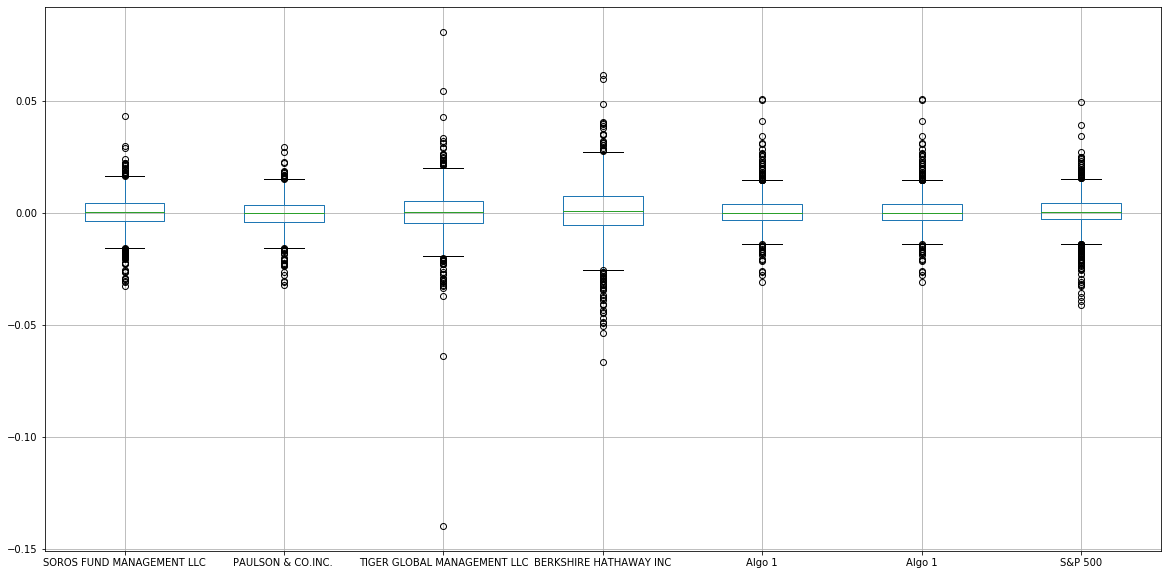

In [39]:
# Box plot to visually show risk
boxplot = all_daily_returns.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 1','S&P 500'], figsize=(20,10),)

In [40]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
all_portfolio_std=all_daily_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [41]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [42]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
all_portfolio_std_annualized=all_portfolio_std * np.sqrt(252)

all_portfolio_std_annualized

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

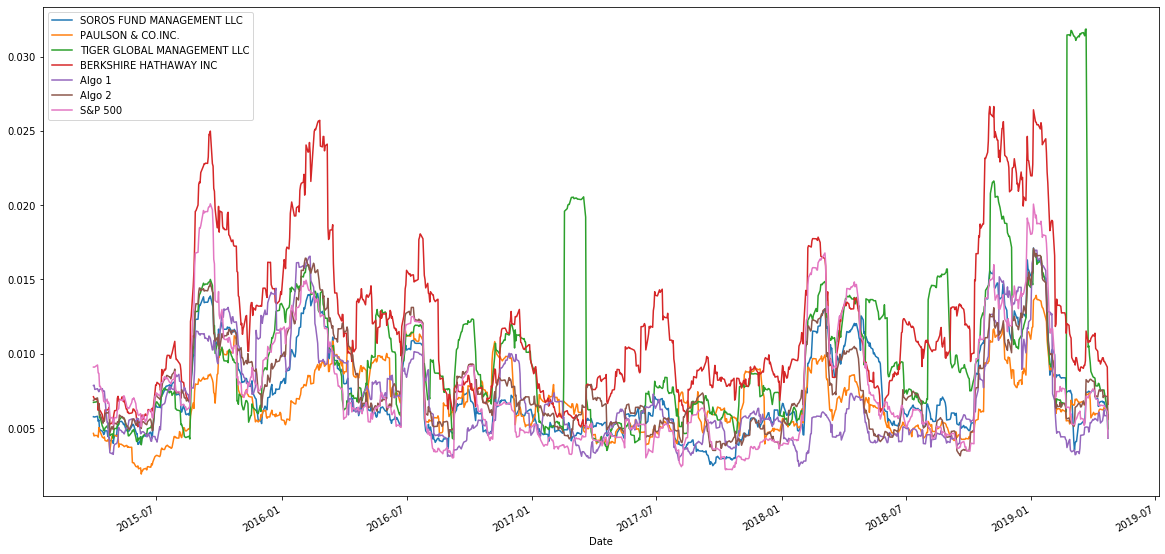

In [43]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

all_daily_returns.rolling(window=21).std().plot(figsize=(20,10))

In [44]:
# Construct a correlation table
# YOUR CODE HERE

all_daily_returns_corr = all_daily_returns.corr()
all_daily_returns_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


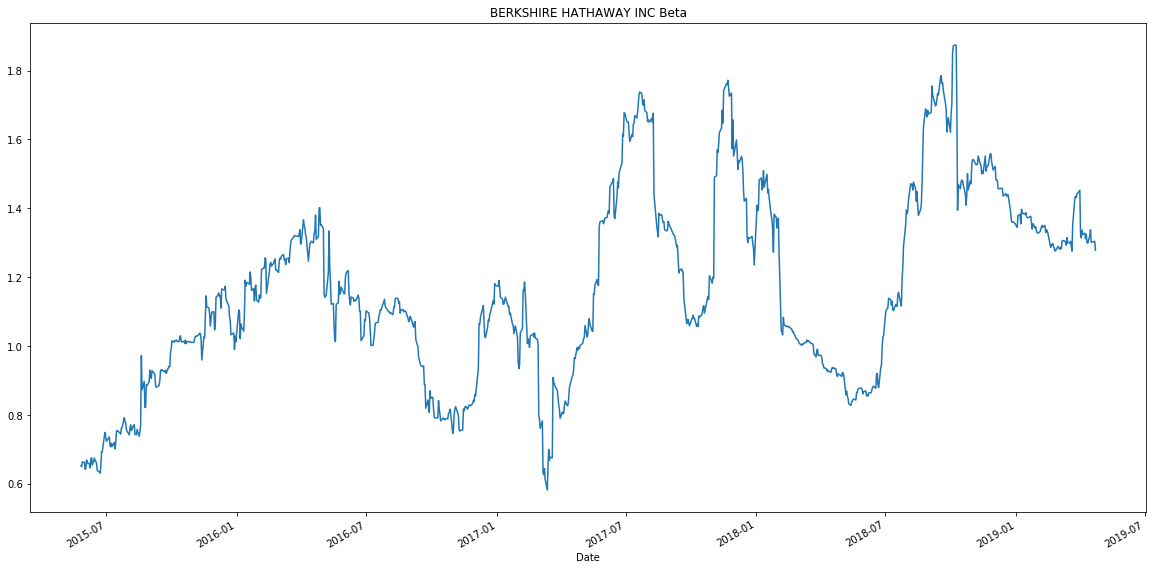

In [45]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
sp500_rolling_variance = all_daily_returns['S&P 500'].rolling(window=60).var()

bhi_covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].cov(all_daily_returns['S&P 500'])

bhi_variance = all_daily_returns['BERKSHIRE HATHAWAY INC'].var()

bhi_beta = bhi_covariance / bhi_variance


# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
bhi_rolling_covariance = all_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_daily_returns['S&P 500'])


# Calculate 30-day rolling beta of MSFT and plot the data
bhi_rolling_beta = bhi_rolling_covariance / sp500_rolling_variance
bhi_rolling_beta.plot(figsize=(20, 10), title='BERKSHIRE HATHAWAY INC Beta')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

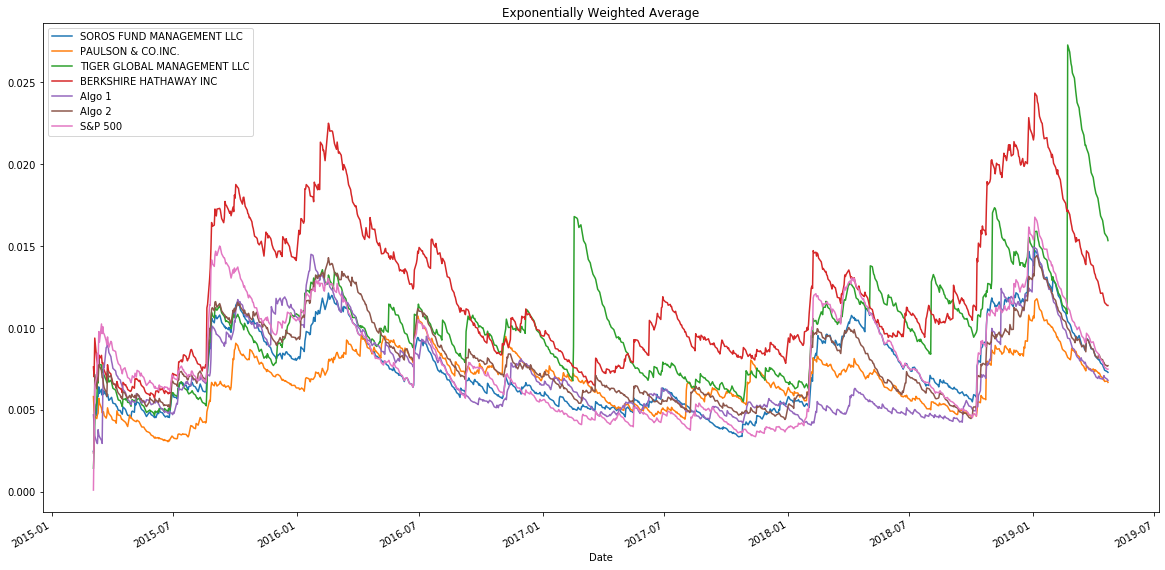

In [25]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [46]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
 # Calculate std dev for all investments for each portfolio
all_returns_annualized = all_daily_returns.std() * np.sqrt(252)

# Calculate sharpe ratio
all_returns__sharpe_ratios = (all_daily_returns.mean() * 252) / (all_returns_annualized)


all_returns__sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

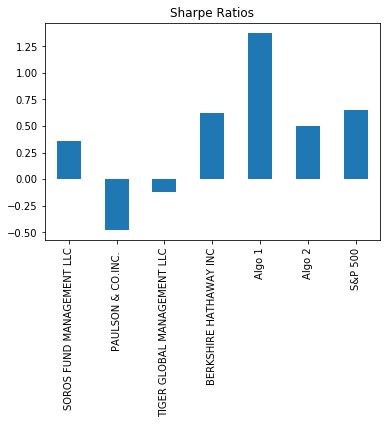

In [47]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_returns__sharpe_ratios.plot.bar(title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [56]:
# Read the first stock
# YOUR CODE HERE
goog_csv = Path("Resources/goog_historical.csv")
goog_stock_prices = pd.read_csv(goog_csv, index_col="Trade DATE",parse_dates=True, infer_datetime_format=True)
goog_stock_prices.sort_index(inplace=True)
goog_stock_prices

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [55]:
# Read the second stock
# YOUR CODE HERE
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_stock_prices = pd.read_csv(aapl_csv, index_col="Trade DATE",parse_dates=True, infer_datetime_format=True)
aapl_stock_prices.sort_index(inplace=True)
aapl_stock_prices

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [58]:
# Read the third stock
# YOUR CODE HERE
cost_csv = Path("Resources/cost_historical.csv")
cost_stock_prices = pd.read_csv(cost_csv, index_col="Trade DATE",parse_dates=True, infer_datetime_format=True)
cost_stock_prices.sort_index(inplace=True)
cost_stock_prices

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [81]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks = pd.concat([goog_stock_prices,aapl_stock_prices,cost_stock_prices], axis='rows', join='inner')

all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [82]:
# Reset the index
# YOUR CODE HERE
all_stocks.reset_index(inplace=True)
all_stocks

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,COST,244.62
746,2019-05-06,COST,244.23
747,2019-05-07,COST,240.18
748,2019-05-08,COST,241.34


In [83]:
all_stocks.pivot(index='Trade DATE', columns='Symbol', values='NOCP')

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [84]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
all_stocks_pivot = all_stocks.pivot(index='Trade DATE', columns='Symbol', values='NOCP')
all_stocks_pivot

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [85]:
# Drop Nulls
# YOUR CODE HERE
all_stocks_pivot.dropna()
all_stocks_pivot.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

In [86]:
all_stocks_pivot

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [87]:
all_stocks_pivot['AAPL']=all_stocks_pivot["AAPL"].pct_change()
all_stocks_pivot['COST']=all_stocks_pivot["COST"].pct_change()
all_stocks_pivot['GOOG']=all_stocks_pivot["GOOG"].pct_change()
all_stocks_pivot

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [88]:
all_stocks_pivot.dropna()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [91]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
all_stocks_pivot_returns = all_stocks_pivot.dot(weights)
all_stocks_pivot_returns.dropna()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

In [105]:
all_portfolio = pd.concat([all_daily_returns,all_stocks_pivot_returns], axis='columns', join='inner')

all_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595


In [113]:

all_portfolio.rename(columns={all_portfolio.columns[7]:"Custom"},
                 inplace=True)

In [116]:
all_portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595


## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [117]:

# I did it even before you said it. See above
all_portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [133]:
all_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         1
dtype: int64

In [134]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolio.dropna(inplace=True)

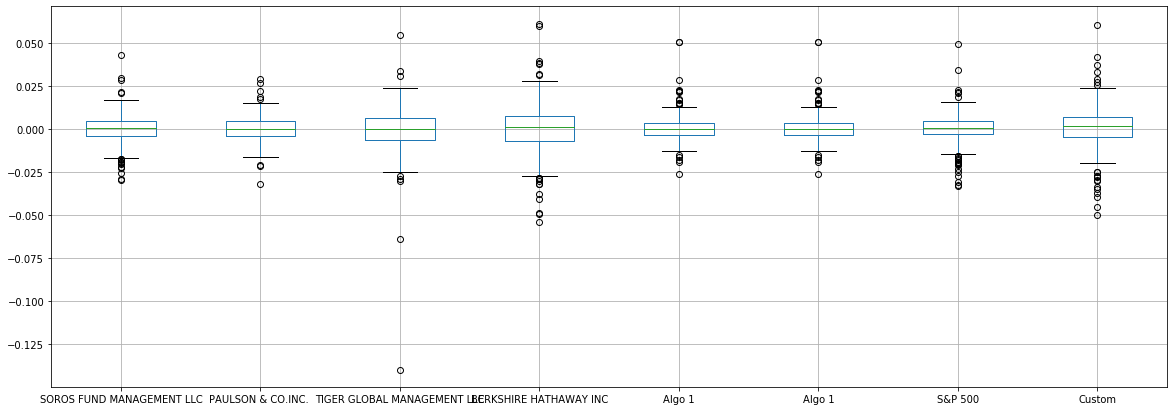

In [135]:
# Box plot to visually show risk
all_portfolio.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 1','S&P 500','Custom'], figsize=(20,7),)

In [136]:
all_portfolio_std_new=all_portfolio.std()
all_portfolio_std_new

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
Custom                         0.013323
dtype: float64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [137]:
# Risk
# YOUR CODE HERE
all_portfolio_std_new_annualized=all_portfolio_std_new * np.sqrt(252)
all_portfolio_std_new_annualized

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

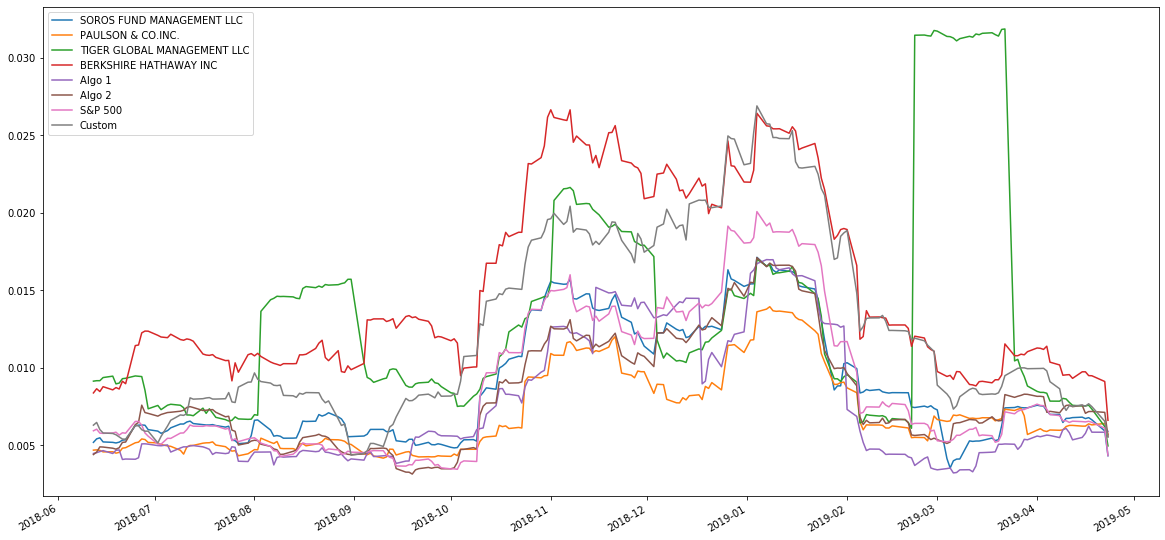

In [138]:
# Rolling
# YOUR CODE HERE
all_portfolio.rolling(window=21).std().plot(figsize=(20,10))


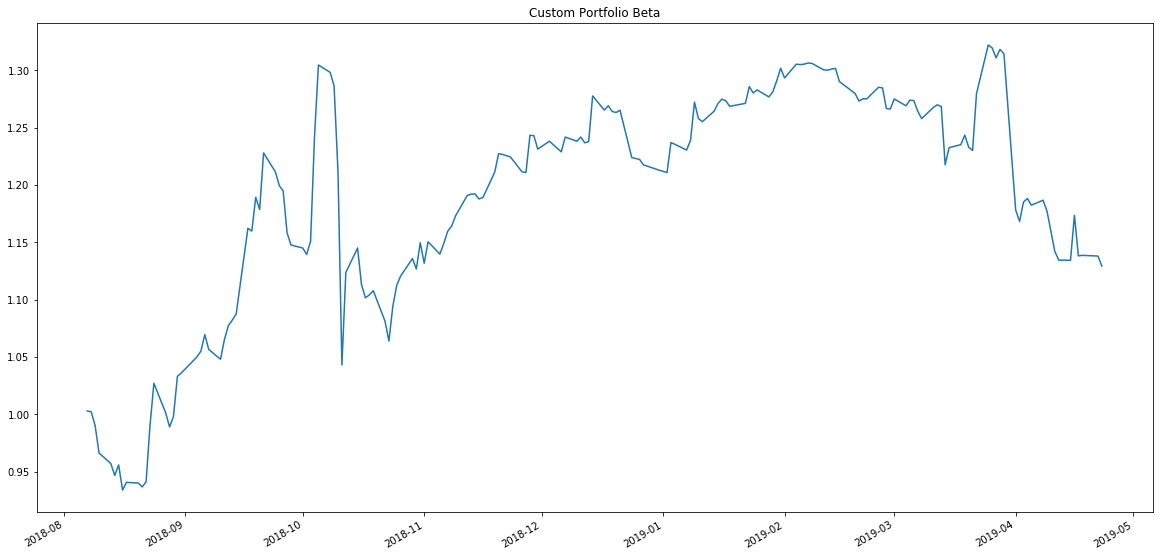

In [139]:
# Beta
# YOUR CODE HERE
sp500_rolling_variance_new = all_portfolio['S&P 500'].rolling(window=60).var()
custom_rolling_covariance = all_portfolio['Custom'].rolling(window=60).cov(all_portfolio['S&P 500'])
custom_rolling_beta = custom_rolling_covariance / sp500_rolling_variance_new
custom_rolling_beta.plot(figsize=(20, 10), title='Custom Portfolio Beta')

In [140]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
all_portfolio_annualized = all_portfolio.std() * np.sqrt(252)
all_portfolio_sharpe_ratios = (all_portfolio.mean() * 252) / (all_portfolio_annualized)
all_portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

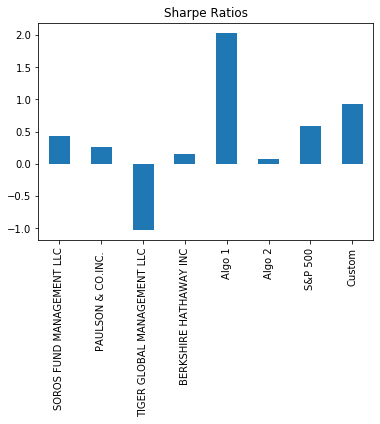

In [141]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_portfolio_sharpe_ratios.plot.bar(title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [142]:
# YOUR CODE HERE
correlation = all_portfolio.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


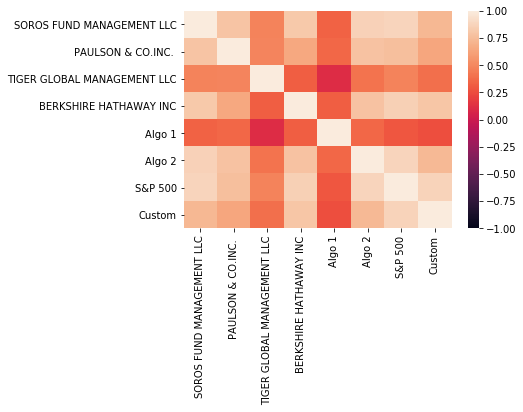

In [143]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)